1️⃣ Step 1: Formulate Hypotheses

A. Profit by Region

Null hypothesis (H₀): Mean profit is the same across all regions

Alternative hypothesis (H₁): At least one region has a different mean profit

B. Profit by Category

Null hypothesis (H₀): Mean profit is the same across all product categories

Alternative hypothesis (H₁): At least one category has a different mean profit

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [4]:
df = pd.read_csv('super-store.csv', encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
# Profit by Region
regions = df['Region'].unique()
region_groups = [df[df['Region'] == r]['Profit'] for r in regions]
anova_region = f_oneway(*region_groups)
print("ANOVA Region:", anova_region)

ANOVA Region: F_onewayResult(statistic=np.float64(2.622478154727811), pvalue=np.float64(0.04889160022144677))


Our ANOVA test returned a p-value of 0.049. This indicates that geography does play a significant role in our profitability. While the effect isn't massive (given the F-statistic of 2.62), it’s enough to conclude that we shouldn't treat all regions as equal when forecasting or setting budgets.

In [12]:
categories = df['Category'].unique()
category_groups = [df[df['Category'] == c]['Profit'] for c in categories]
anova_category = f_oneway(*category_groups)
print("ANOVA Category:", anova_category)

ANOVA Category: F_onewayResult(statistic=np.float64(54.31102304381537), pvalue=np.float64(3.469918346218076e-24))


While both tests were significant, the Category analysis is the clear standout. With an F-statistic of 54.3, product category is a much stronger predictor of profit than region. This suggests that our business strategy should prioritize optimizing our product mix over geographic expansion.

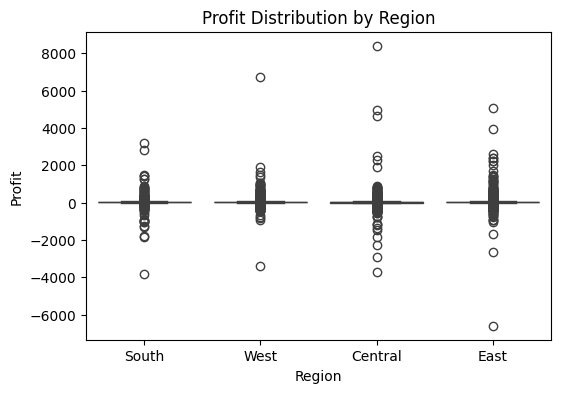

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Region', y='Profit', data=df)
plt.title('Profit Distribution by Region')
plt.show()

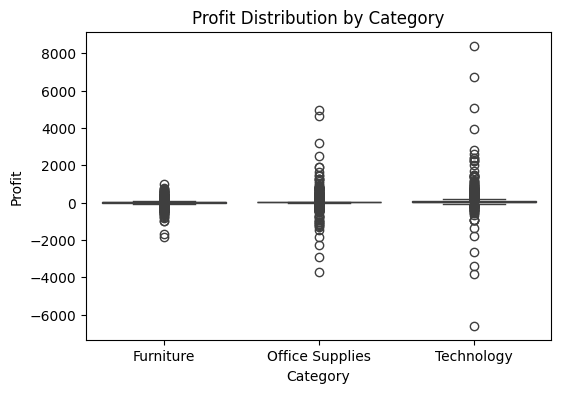

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title('Profit Distribution by Category')
plt.show()